# Exercise 2

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import math
#import ipympl

## Task 1

### Utility functions

In [8]:
def field_vector(coords:np.array) -> np.array:
    '''
    Takes x, y, z coordinates and returns a field vector
    '''
    x,y,z = coords
    sig: int = 10
    ro: int = 28
    bet: float = 8/3
    return np.array([sig*(y-x), x*(ro-z)-y, x*y-bet*z])

In [9]:
def tent_map_iterator(gt: np.array, a: float) -> np.array:
    '''
    Takes gn and performs tent map iteration for calculating gn+1 error
    '''
    return np.array([1.99999*g + a/2 if g >= -a/2 and g < 0 else -1.99999*g + a/2 for g in gt])

In [48]:
def lorrenz_attractor(Z_t: np.array,dt: float,t: int):
    '''
    Takes initial co-ordinates and simulate a lorrenz attractor with dt time interval and t observations
    '''
    iterations = int(t/dt)
    a = 1/np.sqrt(dt)
    g1 = a*(1/np.sqrt(2) - 1/2)
    g2 = a*(1/np.sqrt(3) - 1/2)
    g3 = a*(1/np.sqrt(5) - 1/2)
    gt = np.array([g1, g2, g3])

    f_z = field_vector(Z_t)
    X_cord = [Z_ini[0],]
    Y_cord = [Z_ini[1],]
    Z_cord = [Z_ini[2],]
    Z_t = np.array(Z_t)
    for i in range(iterations):
        
        # Calculating Z_t+1
        Z_new = Z_t + dt*(f_z+gt)
        
        # Updating gt to gt+1
        gt = tent_map_iterator(gt,a)
        
        # Getting new coordinates and appending to a list
        x,y,z = Z_new
        X_cord.append(x)
        Y_cord.append(y)
        Z_cord.append(z)
        
        # Updating the field vector and the states of the Z_vector
        f_z = field_vector(Z_new)
        Z_t = Z_new
    return [X_cord,Y_cord,Z_cord]

### Plotting the Lorrenz Attractor

In [117]:
### Initializing params
Z_ini: np.array = np.array([-0.587,-0.563,16.870])
dt: float = 0.001
t: int = 200

# Getting all lorrenz attractor coordinates
all_coords: list = lorrenz_attractor(Z_ini,dt,t)

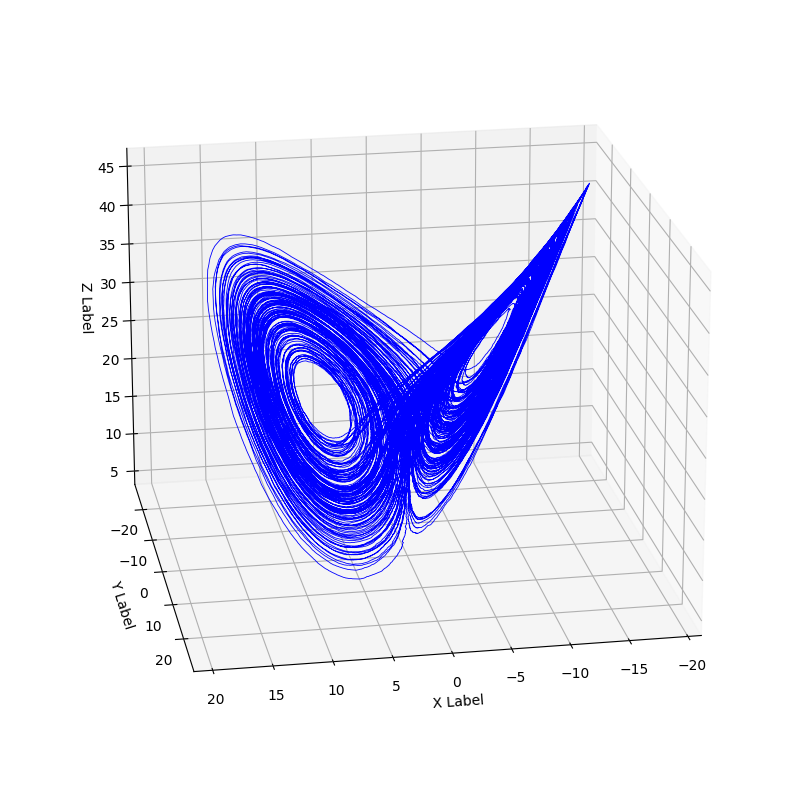

In [118]:
# Generating the plot
x,y,z = all_coords[0],all_coords[1],all_coords[2]
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x,y,z, color = 'blue', lw = 0.6)
ax.view_init(20,80)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

## Task 2

In [191]:
# def measurement_error(iterate_cf:int,eta_0: float, a: int) -> float:
#     '''
#     Takes gn and performs tent map iteration for calculating gn+1 error
#     '''
#     measurement_error: float = 0.0
#     begin = iterate_cf-19
#     end = iterate_cf+1
#     for index in range(begin,end):
#         eta_t = eta_0
#         for i in range(10*index):
#             eta_t = 1.99999*eta_t + a/2 if eta_t >= -a/2 and eta_t < 0 else -1.99999*eta_t + a/2
#         measurement_error+=eta_t
#     return measurement_error

# def h_map(Z_ref: np.array) -> float:
#     return Z_ref[0]

In [197]:
def measurement_errors(eta_0,a):
    err = [eta_0]
    eta_t = eta_0
    for i in range(40000):
        eta_t = 1.99999*eta_t + a/2 if eta_t >= -a/2 and eta_t < 0 else -1.99999*eta_t + a/2
        if i%10 == 0:
            err.append(eta_t)
    summ_err = [eta_0,]
    for i in range(200):
        summ_err.append(sum(err[(i+1)*20-19:(i+1)*20])/20)
        
    return summ_err

In [198]:
def x_obs(x_ref: list,dt: float,t: int):
    iterations = int(t/dt)
    a:int = 4
    eta_0:float = a*(1/np.sqrt(2) - 1/2)
    m_e = measurement_errors(eta_0,a)
    X_obs = [x_ref[0],]
    for i in range(1,iterations+1):
        #iterate_cf = i*20
        #error.append(1/20*(measurement_error(iterate_cf,eta_0,a)))
        # Calculating x_obs
        val = x_ref[i] + m_e[i]
        X_obs.append(val) 
        
    return X_obs,m_e

In [199]:
### Initializing params
Z_ini: np.array = np.array([-0.587,-0.563,16.870])
dt: float = 0.001
t: int = 200

# Getting all lorrenz attractor coordinates
z_ref: list = lorrenz_attractor(Z_ini,dt,t)
x_ref = h_map(z_ref)

In [200]:
dt: float = 0.05
t: int = 10
observed_x,errors = x_obs(x_ref,dt,t)

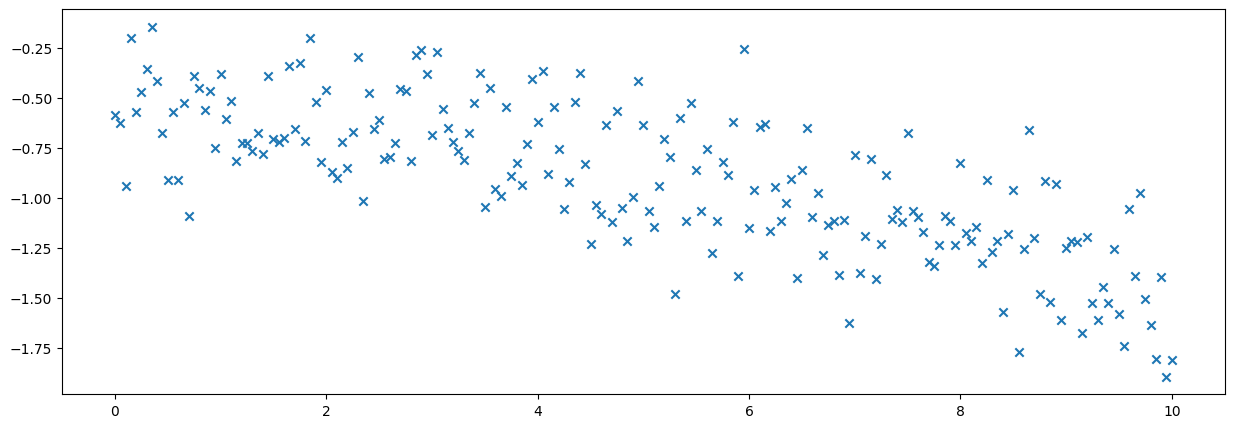

In [203]:
plt.figure(figsize=(15,5))
plt.scatter([i*t_out for i in range(len(observed_x))], observed_x, marker="x")
plt.show()

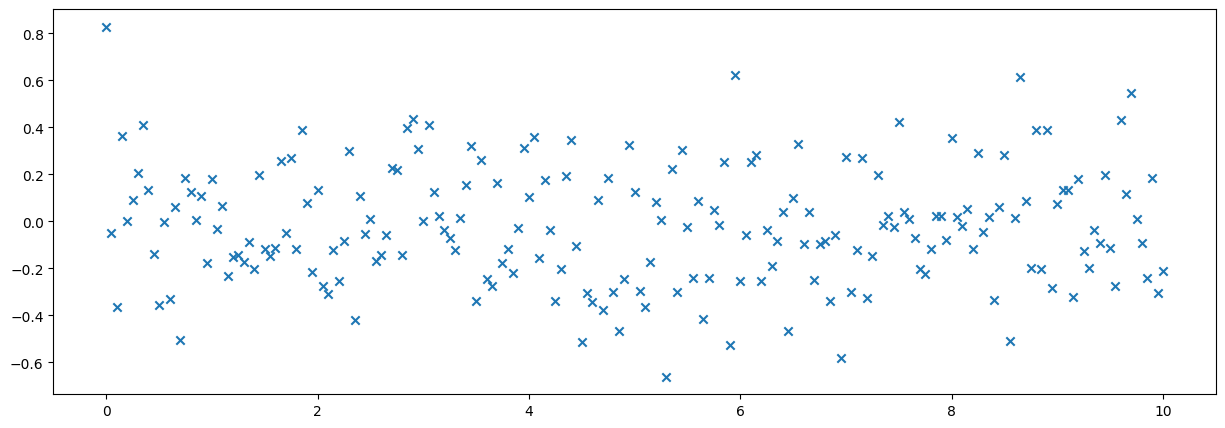

In [204]:
plt.figure(figsize=(15,5))
plt.scatter([i*t_out for i in range(len(errors))], errors, marker="x")

## Task 3